### Student Details

Student name: Ananya Krithika Thyagarajan

Student ID: 23187123

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Implement Logistic Regression 

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [2]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) + 
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [14]:
################################
# Class stub for you to fill the rest of the code


import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

class LogisticRegressionGD:
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Initialize weights
        self.cost_ = []  # List to store the cost for each epoch

        for _ in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # Compute the logistic loss for this epoch
            cost = -y.dot(np.log(output.clip(min=1e-250, max=None))) - ((1 - y).dot(np.log(1 - output.clip(min=1e-250, max=None))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # Sigmoid activation function
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        # Return binary predictions (0 or 1)
        net_input = self.net_input(X)
        output = self.activation(net_input)
        return np.where(output >= 0.5, 1, 0)

# Load the Iris dataset
iris = load_iris()
data_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data_iris['target'] = iris.target
data_iris = data_iris[data_iris['target'] != 2]  # Keep only Iris-setosa and Iris-versicolor

# Select sepal length and petal length features
X = data_iris[['sepal length (cm)', 'petal length (cm)']].to_numpy()

# Create the target labels (0 for Iris-setosa, 1 for Iris-versicolor)
y = (data_iris['target'] == 1).astype(int)

# Create and train the logistic regression model
model = LogisticRegressionGD(eta=0.01, epochs=100)
model.train(X, y)

# Predict on new data
new_d = np.array([[5.1, 1.4], [6.5, 4.9]])
predictions = model.predict(new_d)
print("Predictions for new data:", predictions)


Predictions for new data: [0 1]


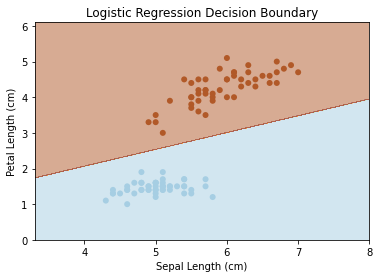

In [15]:

################################
# Your code here


import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
    ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in the region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, lw=0)
    
    return fig, ax



# Create a plot of the decision boundary
plot_decision_boundary(X, y, model)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Logistic Regression Decision Boundary')
plt.show()


# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

In [19]:
from sklearn.linear_model import LogisticRegression

################################
# Your code here

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris_new = load_iris()
X = iris_new.data[:, 2:4]  # Use petal length and petal width as features
y = iris_new.target

# Assign class labels as specified
class_labels = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply standard scaling to training and test data
Stdscaler = StandardScaler()
X_train = Stdscaler.fit_transform(X_train)
X_test = Stdscaler.transform(X_test)

# Train a LogisticRegression model on the training data
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)



LogisticRegression(random_state=42)

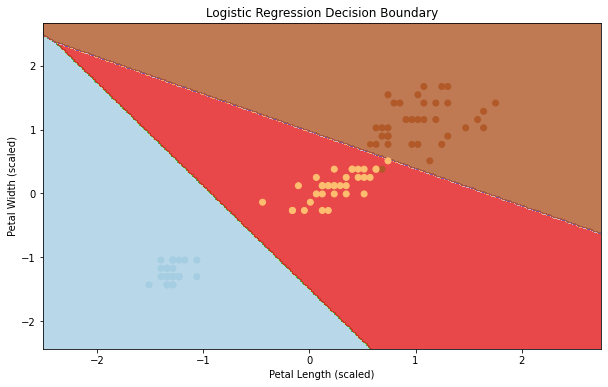

Accuracy on test data: 0.91


In [21]:
from plot_decision_boundary import plot_decision_boundary

################################
# Your code here



# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Petal Length (scaled)')
    plt.ylabel('Petal Width (scaled)')

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, logistic_model)
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Calculate accuracy on the test data
y_predict = logistic_model.predict(X_test)
accuracyScore2 = accuracy_score(y_test, y_predict)
print(f'Accuracy on test data: {accuracyScore:.2f}')


<span style="color:red">Insert your text answers below</span>.

Accuracy on test data: 0.91

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

Scaled Training Data:
 [[-0.4419858  -0.13661044]
 [ 0.40282929  0.38029394]
 [-1.2868009  -1.17041921]
 [ 1.19132338  1.41410271]
 [ 0.17754527  0.12184175]
 [ 0.79707634  1.41410271]
 [-1.2868009  -1.4288714 ]
 [-1.23047989 -1.29964531]
 [-1.3431219  -1.29964531]
 [ 1.19132338  1.15565051]
 [ 0.74075533  1.02642442]
 [-1.3431219  -1.29964531]
 [-1.23047989 -1.29964531]
 [ 0.40282929  0.38029394]
 [ 0.00858225 -0.13661044]
 [ 1.24764439  0.76797223]
 [-1.23047989 -1.04119311]
 [-1.23047989 -1.29964531]
 [ 1.07868137  1.6725549 ]
 [ 0.57179231  0.76797223]
 [-1.2868009  -1.04119311]
 [ 0.62811332  0.76797223]
 [ 1.58557043  1.15565051]
 [ 1.64189143  1.02642442]
 [ 0.23386627 -0.00738435]
 [-1.3431219  -1.17041921]
 [-1.2868009  -1.04119311]
 [-1.39944291 -1.04119311]
 [ 0.62811332  0.38029394]
 [ 0.12122426  0.12184175]
 [-1.2868009  -1.04119311]
 [-1.3431219  -1.17041921]
 [ 0.17754527 -0.26583654]
 [-0.10405976  0.12184175]
 [-1.3431219  -1.4288714 ]
 [-1.3431219  -1.17041921]
 [ 0.

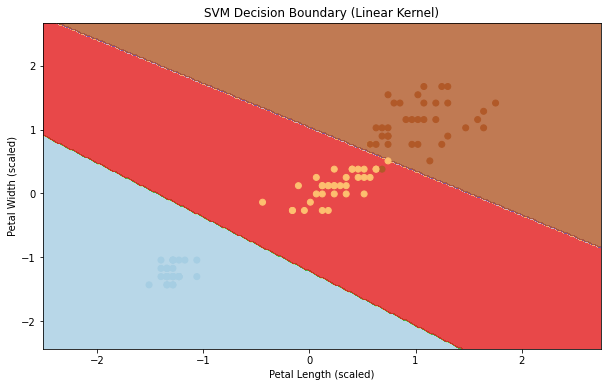

Accuracy on test data: 0.91


In [26]:

################################
# Your code here

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris_data3 = load_iris()
X = iris_data3.data[:, 2:4]  # Use petal length and petal width as features
y = iris_data3.target

# Assign class labels as specified
class_labels = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply standard scaling to training and test data
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

# Print the scaled data
print("Scaled Training Data:\n", X_train)
print("Scaled Test Data:\n", X_test)

# Train an SVM (Support Vector Classifier) model with a linear kernel
svm_mod = SVC(kernel='linear', random_state=42)
svm_mod.fit(X_train, y_train)

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Petal Length (scaled)')
    plt.ylabel('Petal Width (scaled)')

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, svm_mod)
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.show()

# Calculate accuracy on the test data
y_pred2 = svm_mod.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy on test data: {accuracy2:.2f}')


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution 

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function 

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

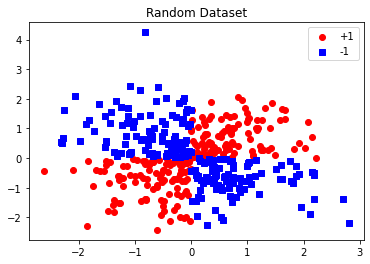

In [23]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.title("Random Dataset")
plt.show()

<span style="color:red">Insert your code below</span>.

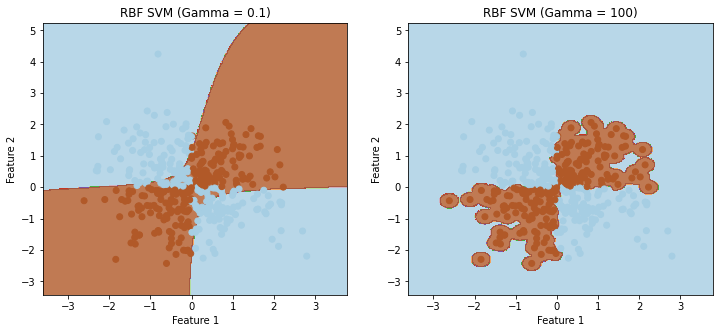

In [24]:
################################
# Your code here


# Create an RBF kernel SVM model with gamma = 0.1
svm_model_low_g = SVC(kernel='rbf', gamma=0.1, random_state=42)
svm_model_low_g.fit(X_r, y_r)

# Create an RBF kernel SVM model with gamma = 100
svm_model_high_g = SVC(kernel='rbf', gamma=100, random_state=42)
svm_model_high_g.fit(X_r, y_r)

# Plot the decision boundaries with low and high gamma values
def plot_decision_boundary_rbf(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

# Plot the decision boundaries with different gamma values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary_rbf(X_r, y_r, svm_model_low_g, 'RBF SVM (Gamma = 0.1)')
plt.subplot(1, 2, 2)
plot_decision_boundary_rbf(X_r, y_r, svm_model_high_g, 'RBF SVM (Gamma = 100)')
plt.show()


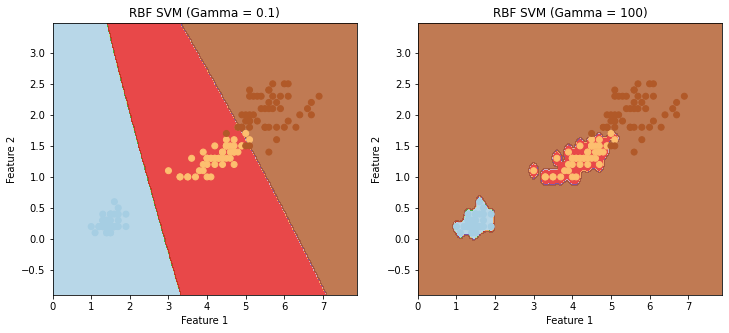

In [27]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data4 = load_iris()
X_iris = iris_data4.data[:, 2:4]
y_iris = iris_data4.target

# Create an RBF kernel SVM model with gamma = 0.1 for the Iris dataset
svm_model_low_g_iris = SVC(kernel='rbf', gamma=0.1, random_state=42)
svm_model_low_g_iris.fit(X_iris, y_iris)

# Create an RBF kernel SVM model with gamma = 100 for the Iris dataset
svm_model_high_g_iris = SVC(kernel='rbf', gamma=100, random_state=42)
svm_model_high_g_iris.fit(X_iris, y_iris)

# Plot the decision boundaries for the Iris dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary_rbf(X_iris, y_iris, svm_model_low_g_iris, 'RBF SVM (Gamma = 0.1)')
plt.subplot(1, 2, 2)
plot_decision_boundary_rbf(X_iris, y_iris, svm_model_high_g_iris, 'RBF SVM (Gamma = 100)')
plt.show()
